In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('./grocery_store_data.csv')
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [35]:
df['Order Date'].info

<bound method Series.info of 0       11-08-2017
1       11-08-2017
2       06-12-2017
3       10-11-2016
4       10-11-2016
           ...    
9989    12/24/2015
9990    07-12-2015
9991    06-06-2017
9992    10/16/2018
9993     4/17/2018
Name: Order Date, Length: 9994, dtype: object>

In [50]:
df['Customer Name'].info

<bound method Series.info of 0        Harish
1         Sudha
2       Hussain
3       Jackson
4       Ridhesh
         ...   
9989     Sudeep
9990       Alan
9991       Ravi
9992       Peer
9993     Ganesh
Name: Customer Name, Length: 9994, dtype: object>

In [36]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [37]:
df.duplicated().sum()

0

In [38]:
df['Category'].unique()

array(['Oil & Masala', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks', 'Eggs, Meat & Fish'], dtype=object)

In [39]:
df['Category'].value_counts(normalize=False)

Category
Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1361
Name: count, dtype: int64

In [40]:
df['Sub Category'].unique()

array(['Masalas', 'Health Drinks', 'Atta & Flour', 'Fresh Vegetables',
       'Organic Staples', 'Fresh Fruits', 'Biscuits', 'Cakes',
       'Chocolates', 'Eggs', 'Cookies', 'Chicken', 'Edible Oil & Ghee',
       'Mutton', 'Soft Drinks', 'Dals & Pulses', 'Organic Vegetables',
       'Noodles', 'Organic Fruits', 'Fish', 'Spices', 'Rice',
       'Breads & Buns'], dtype=object)

In [41]:
df['Sub Category'].value_counts(normalize=False)

Sub Category
Health Drinks         719
Soft Drinks           681
Cookies               520
Breads & Buns         502
Chocolates            499
Noodles               495
Masalas               463
Biscuits              459
Cakes                 452
Edible Oil & Ghee     451
Spices                447
Mutton                394
Eggs                  379
Organic Staples       372
Fresh Fruits          369
Fish                  369
Fresh Vegetables      354
Atta & Flour          353
Organic Fruits        348
Chicken               348
Organic Vegetables    347
Dals & Pulses         343
Rice                  330
Name: count, dtype: int64

In [42]:
df['City'].unique()

array(['Vellore', 'Krishnagiri', 'Perambalur', 'Dharmapuri', 'Ooty',
       'Trichy', 'Ramanadhapuram', 'Tirunelveli', 'Chennai', 'Karur',
       'Namakkal', 'Dindigul', 'Kanyakumari', 'Bodi', 'Tenkasi',
       'Viluppuram', 'Madurai', 'Salem', 'Cumbum', 'Nagercoil',
       'Pudukottai', 'Theni', 'Coimbatore', 'Virudhunagar'], dtype=object)

C:\Users\Sohail\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


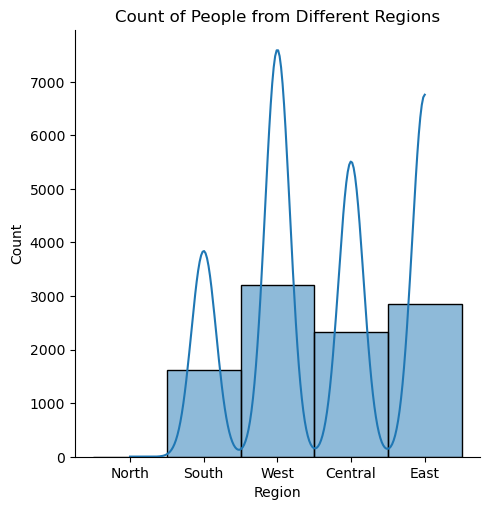

In [43]:
sns.displot(df['Region'],kde=True)
plt.title('Count of People from Different Regions')
plt.show()

In [53]:
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
print(sales_by_region)

    Region    Sales
0  Central  3468156
1     East  4248368
2    North     1254
3    South  2440461
4     West  4798743


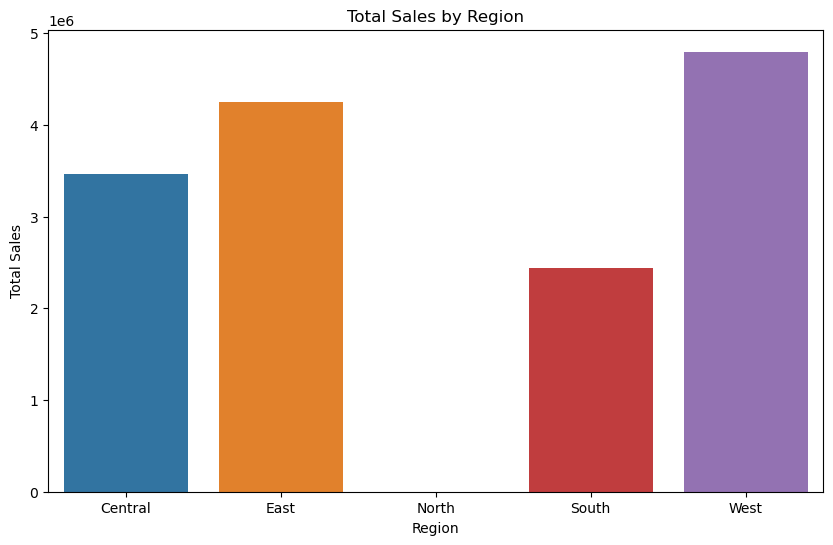

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=sales_by_region)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In [56]:
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()
print(profit_by_region)

    Region      Profit
0  Central   856806.84
1     East  1074345.58
2    North      401.28
3    South   623562.89
4     West  1192004.61


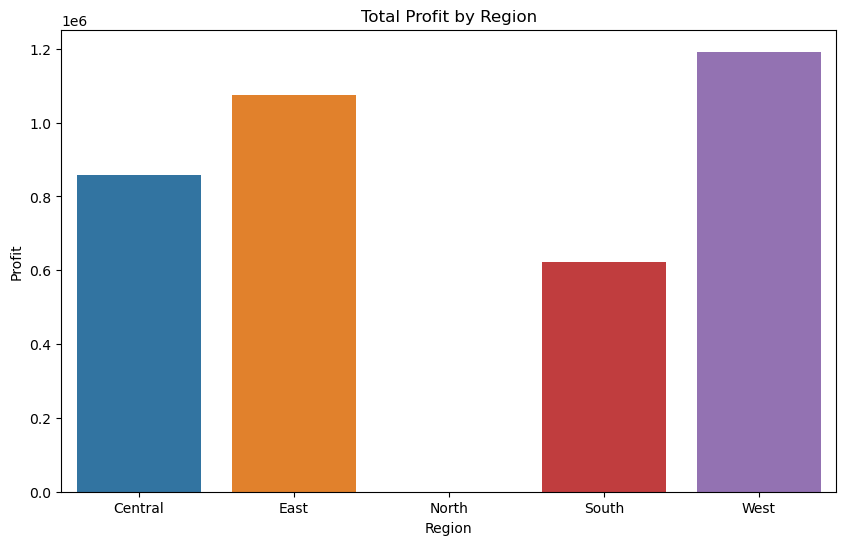

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=profit_by_region)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

In [58]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
print(sales_by_category)

            Category    Sales
0             Bakery  2112281
1          Beverages  2085313
2  Eggs, Meat & Fish  2267401
3        Food Grains  2115272
4   Fruits & Veggies  2100727
5       Oil & Masala  2038442
6             Snacks  2237546


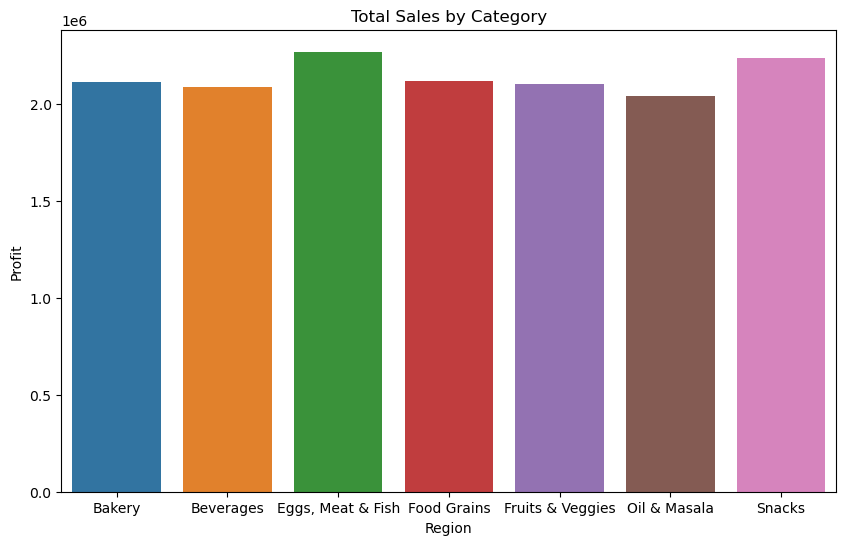

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=sales_by_category)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

In [60]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()
print(profit_by_category)

            Category     Profit
0             Bakery  528521.06
1          Beverages  525605.76
2  Eggs, Meat & Fish  567357.22
3        Food Grains  529162.64
4   Fruits & Veggies  530400.38
5       Oil & Masala  497895.29
6             Snacks  568178.85


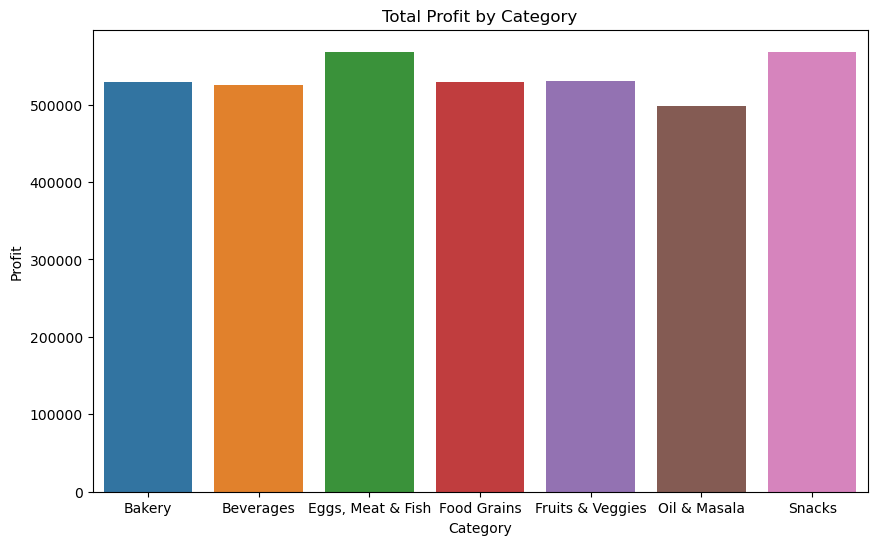

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=profit_by_category)
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

In [62]:
sales_by_subcategory = df.groupby('Sub Category')['Sales'].sum().reset_index()
print(sales_by_subcategory)

          Sub Category    Sales
0         Atta & Flour   534649
1             Biscuits   684083
2        Breads & Buns   742586
3                Cakes   685612
4              Chicken   520497
5           Chocolates   733898
6              Cookies   768213
7        Dals & Pulses   523371
8    Edible Oil & Ghee   668086
9                 Eggs   575156
10                Fish   560548
11        Fresh Fruits   551212
12    Fresh Vegetables   525842
13       Health Drinks  1051439
14             Masalas   697480
15              Mutton   611200
16             Noodles   735435
17      Organic Fruits   503402
18     Organic Staples   558929
19  Organic Vegetables   520271
20                Rice   498323
21         Soft Drinks  1033874
22              Spices   672876


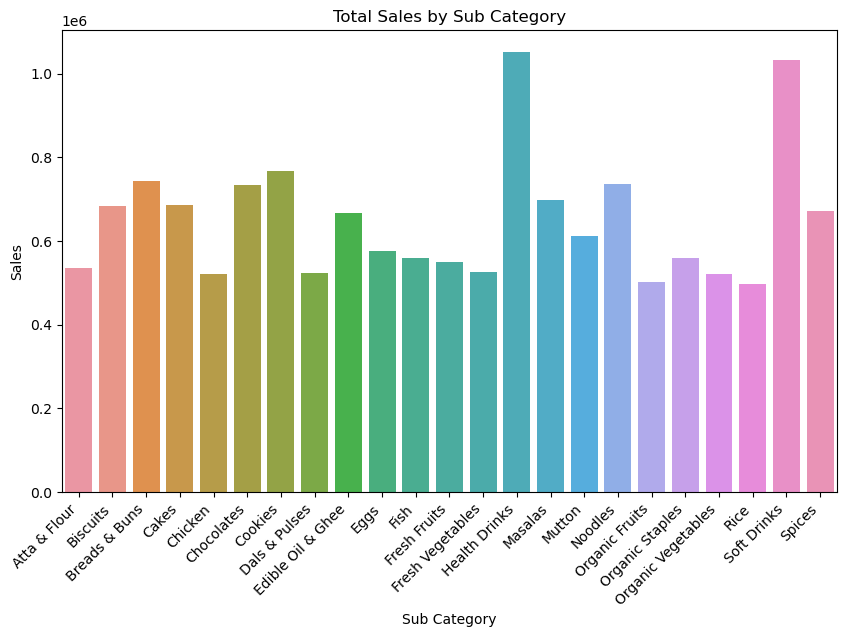

In [65]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Sub Category', y='Sales', data=sales_by_subcategory)
plt.title('Total Sales by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Sales')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [66]:
profit_by_subcategory = df.groupby('Sub Category')['Profit'].sum().reset_index()
print(profit_by_subcategory)

          Sub Category     Profit
0         Atta & Flour  127861.10
1             Biscuits  169357.62
2        Breads & Buns  190764.98
3                Cakes  168398.46
4              Chicken  124049.89
5           Chocolates  183849.34
6              Cookies  190643.70
7        Dals & Pulses  130232.29
8    Edible Oil & Ghee  168593.58
9                 Eggs  144669.92
10                Fish  147248.01
11        Fresh Fruits  134668.35
12    Fresh Vegetables  131273.33
13       Health Drinks  267469.79
14             Masalas  168999.11
15              Mutton  151389.40
16             Noodles  193685.81
17      Organic Fruits  130862.33
18     Organic Staples  144136.89
19  Organic Vegetables  133596.37
20                Rice  126932.36
21         Soft Drinks  258135.97
22              Spices  160302.60


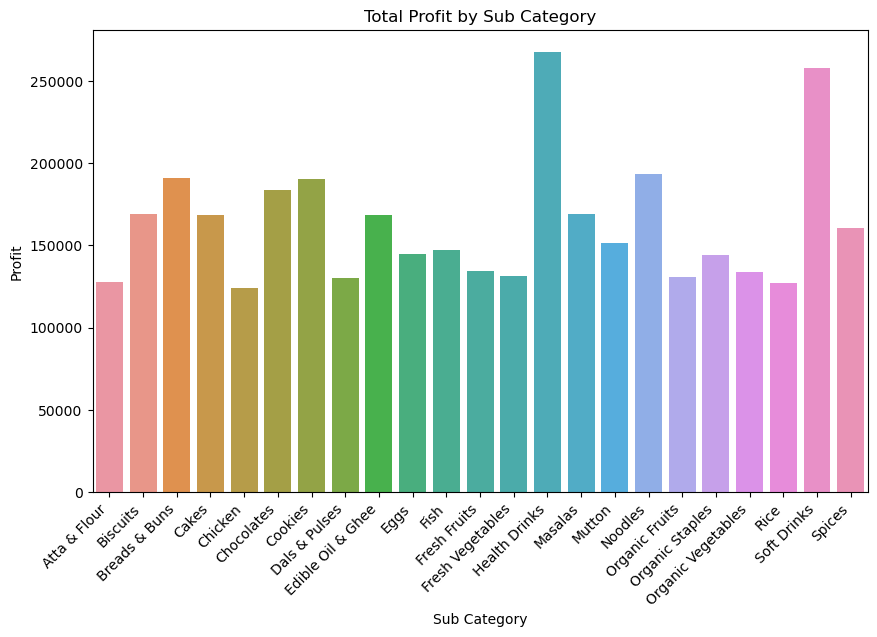

In [67]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Sub Category', y='Profit', data=profit_by_subcategory)
plt.title('Total Profit by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Profit')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()